<a href="https://colab.research.google.com/github/henil2097/Analytical-Model-For-Estimating-Tumor-Growth-Rate/blob/master/PE_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data

,Group,id,Time,TumVol
0,0,1,0,120.1
1,0,1,1,162.8
2,0,1,2,269.8
3,0,1,3,470.6
4,0,1,4,536.6
...,...,...,...,...
252,3,28,3,273.2
253,3,28,4,321.4
254,3,28,5,387.3
255,3,28,6,601.2


In [0]:
def find_volume(t,A,V0,r):
  return  V0*np.exp(A*(1-np.exp(-r*t)))

In [12]:
data = data[data['id'] == 15]
data

,Group,id,Time,TumVol
127,2,15,0,145.0
128,2,15,1,138.8
129,2,15,2,244.3
130,2,15,3,313.8
131,2,15,4,364.0
132,2,15,5,478.0
133,2,15,6,451.2
134,2,15,7,864.9
135,2,15,8,1035.6


In [13]:
from scipy.optimize import curve_fit
t = data['Time'].values
vol = data['TumVol'].values
g = [27.631,100,2]
c,cov = curve_fit(find_volume,t,vol,g)
print(c)
print(cov)

RuntimeError: ignored

In [0]:
n = len(data['Time'])
y = np.empty(n)
for i in range(n):
  y[i] = find_volume(data['Time'][i],c[0],c[1],c[2])

plt.plot(data['Time'],data['TumVol'])
plt.plot(data['Time'],y,'ro')

In [0]:
for i in range(8,100):
  x=find_volume(i,2.809883,86.21815667,0.29171947)
  print(x)
  
#x = find_volume(8,2.809883,86.21815667,0.29171947)

In [0]:
vinf = np.exp(2.809883)*86.21815667
vinf

In [0]:
time = np.array(data['Time'].values)
vol = np.array(data['TumVol'].values)
for i in range(8,100):
  x=find_volume(i,2.809883,86.21815667,0.29171947)
  time = np.append(time,i)
  vol = np.append(vol,x)

In [0]:
time

In [0]:
plt.plot(time,vol)
plt.plot(data['Time'].values,data['TumVol'],'ro')
plt.show()

**10/03/2020**

In [35]:
data1 = pd.read_csv('/content/drive/My Drive/PE Related/tumdat.csv')
data1 = data1[data1['id'] == 9]
data1

,Group,id,Time,TumVol
68,1,9,0,141.5
69,1,9,1,204.4
70,1,9,2,248.7
71,1,9,3,242.5
72,1,9,4,477.9
73,1,9,5,864.2
74,1,9,6,961.1
75,1,9,7,912.1
76,1,9,8,1929.0
77,1,9,9,2164.3


In [0]:
train = data1[data1['Time']<=6]
test = data1[data1['Time']>6]

In [45]:
train

,Group,id,Time,TumVol
68,1,9,0,141.5
69,1,9,1,204.4
70,1,9,2,248.7
71,1,9,3,242.5
72,1,9,4,477.9
73,1,9,5,864.2
74,1,9,6,961.1


In [46]:
test

,Group,id,Time,TumVol
75,1,9,7,912.1
76,1,9,8,1929.0
77,1,9,9,2164.3


In [47]:
from scipy.optimize import curve_fit
t = train['Time'].values
vol = train['TumVol'].values
g = [27.631,1/1000000,3.1]
c,cov = curve_fit(find_volume,t,vol,g)
print(c)
print(cov)
#ID : 4 , g : [27.631,1/1000000,2.1] 

[8.85982778e+00 1.06954886e+02 4.87629825e-02]
[[ 7.10483880e+02  1.41193833e+03 -4.84566836e+00]
 [ 1.41193833e+03  4.14327133e+03 -9.97566620e+00]
 [-4.84566836e+00 -9.97566620e+00  3.31418593e-02]]


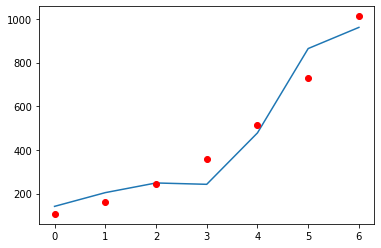

In [48]:
n = len(train['Time'])
y = np.empty(n)
for i in range(n):
  y[i] = find_volume(train['Time'][i+68],c[0],c[1],c[2])

plt.plot(train['Time'],train['TumVol'])
plt.plot(train['Time'],y,'ro')

In [49]:
n1 = len(test['Time'])
y1 = np.empty(n1)
for i in range(n1):
  y1[i]=find_volume(test['Time'][i+75],c[0],c[1],c[2])
y1

array([1386.47875937, 1871.04163115, 2489.1924114 ])

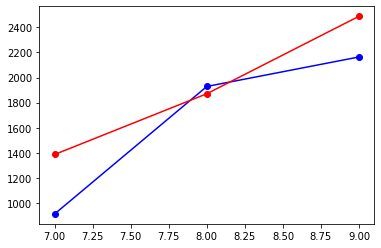

In [50]:
plt.plot(test['Time'],test['TumVol'],'bo-')
plt.plot(test['Time'],y1,'ro-')

In [0]:
import math
def cal_rate(t1,t2,V1,V2):
  Vinf = 753312.102292  #1000000    ################################# Need to check #################################
  return (math.log(math.log(Vinf/V1))-math.log(math.log(Vinf/V2)))/(t2-t1)

In [0]:
n = len(data1['Time'])
y = np.empty(n)
for i in range(n):
  y[i] = find_volume(data1['Time'][i+68],c[0],c[1],c[2])

In [24]:
y

array([ 106.95488602,  163.05284003,  243.63544895,  357.15091378,
        514.11146828,  727.33304109, 1012.13441956, 1386.47875937,
       1871.04163115, 2489.1924114 ])

In [25]:
n1=len(y)
y3=np.empty(n1)
y3[0]=0
for i in range(n1-1):
  #y3[i+1]=cal_rate(0,1,y[0],y[1])
  y3[i+1]=cal_rate(0,1,y[i],y[i+1])
y3

array([0.        , 0.04876298, 0.04876298, 0.04876298, 0.04876298,
       0.04876298, 0.04876298, 0.04876298, 0.04876298, 0.04876298])

In [0]:
n = len(data1['Time'])
y2 = np.empty(n)
y2[0] = 0
for i in range(n-1):
  y2[i+1]=cal_rate(0,1,data1['TumVol'][i+68], data1['TumVol'][i+69])


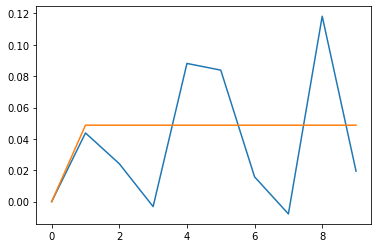

In [27]:
plt.plot(data1['Time'],y2)
plt.plot(data1['Time'],y3)
##without curve-fittig for vinf

In [0]:
'''t = data1['Time'].values
r=y2
g = [0.12,0,204.5]
c,cov = curve_fit(cal_rate,t,r,g)
print(c)
print(cov)
'''

7/4

In [0]:
n1=len(y)
y3=np.empty(n1)
#y3[0]=0
for i in range(n1-1):
  y3[i]=cal_rate(0,1,y[i],y[i+1])
y3

In [0]:
n = len(data1['Time'])
y2 = np.empty(n)
#y2[0] = 0
for i in range(n-1):
  y2[i]=cal_rate(0,1,data1['TumVol'][i+68], data1['TumVol'][i+69])

In [0]:
plt.plot(data1['Time'],y2)
plt.plot(data1['Time'],y3)

In [0]:
n=1000
time = np.empty(n)
vol = np.empty(n)
for i in range(n):
  x=find_volume(i,8.85982778e+00,1.06954886e+02,4.87629825e-02)
  time[i] = i
  vol[i] = x 

plt.plot(time,vol,'ro')
plt.plot(data1['Time'],data1['TumVol'])
plt.show()

In [0]:
vol

In [0]:
y4=np.empty(n)
y4[0]=0
for i in range(n-1):
  y4[i]=cal_rate(0,1,vol[i],vol[i+1])
#y4

In [0]:
plt.plot(data1['Time'],y2)
plt.plot(time,y4)
plt.show()

In [0]:
plt.plot(data1['Time'],y2)

In [0]:
plt.plot(time,y4)

In [0]:
time

ID:1


In [0]:
import math
def cal_rate(Vinf,t1,t2,V1,V2):
  #Vinf = 753312.102292  #1000000    ################################# Need to check #################################
  return (math.log(Vinf/V1)-math.log(Vinf/V2))/(t2-t1)

In [0]:
n=10
time1 = np.empty(n)
vol1 = np.empty(n)
for i in range(n):
  x=find_volume(i,2.809883,86.21815667,0.29171947)
  time1[i] = i
  vol1[i] = x

plt.plot(time1,vol1,'ro')
plt.plot(data['Time'],data['TumVol'])
plt.show()

In [0]:
n1 = len(data['Time'])
y4 = np.empty(n1)
y4[0] = 0
for i in range(n1-1):
  y4[i+1]=cal_rate(1431.90,0,1,data['TumVol'][i], data['TumVol'][i+1])

In [0]:
y5=np.empty(n)
y5[0]=0
for i in range(n-1):
  y5[i+1]=cal_rate(1431.90,0,1,vol1[i],vol1[i+1])

In [0]:
plt.plot(time1,y5,'r')
plt.plot(data['Time'],y4)
plt.show()

In [0]:
plt.plot(data['Time'],y4)

In [0]:
plt.plot(time1,y5)

In [0]:
y5